In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs,make_circles

In [128]:
# Data Generation
X,Y=make_circles(n_samples=500, shuffle=True, noise=0.05, random_state=1, factor=0.8)
#X,Y=make_blobs(n_samples=500, n_features=2, centers=2, random_state=10)

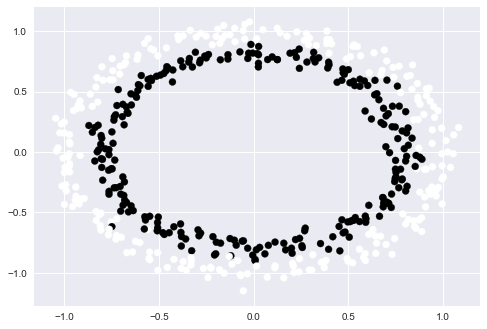

In [129]:
# Visualise Data
plt.style.use('seaborn')
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [130]:
X.shape

(500, 2)

In [131]:
def softmax(a):
    e_pa=np.exp(a) # vector
    ans=e_pa/np.sum(e_pa,axis=1,keepdims=True)
    return ans

In [132]:
a = np.array([[10,10],
              [20,20]])
a_= softmax(a)
print(a_)

[[0.5 0.5]
 [0.5 0.5]]


In [133]:
# Neural Architecture
input_size=2 # Number of features
layers=[4,3] # Number of neurons in hidden layers
output=2 # Number of output classes
class Neuralnetwork:
   def __init__(self,input_size,layers,output):
        np.random.seed(0)
        model={}
        # initialise weight matrix for 1st hidden layer
        model['W1']=np.random.randn(input_size,layers[0])
        # Biases for 1st hidden layer
        model['b1']=np.zeros((1,layers[0]))
        # initialise weight matrix for 2nd hidden layer
        model['W2']=np.random.randn(layers[0],layers[1])
        # initialise biases for 2nd hidden layer
        model['b2']=np.zeros((1,layers[1]))
        # weight matrix for final layer
        model['W3']=np.random.randn(layers[1],output)
        model['b3']=np.zeros((1,output))
        self.model=model
   def forward_prop(self,X):
        model=self.model
        
        W1,W2,W3=model['W1'],model['W2'],model['W3']
        
        b1,b2,b3=model['b1'],model['b2'],model['b3']
        
        z1=np.tanh(np.dot(X,W1)+b1)
        
        z2=np.tanh(np.dot(z1,W2)+b2)
        
        out=softmax(np.dot(z2,W3)+b3)
        self.activation_outputs=(z1,z2,out)
        return out
     
   """def backward(self,x,y,learning_rate=0.001):
        
         W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
         a1,a2,y_ = self.activation_outputs
        
         delta3 = y_ - y
        
         dw3 = np.dot(a2.T,delta3) #)h2+1,C) => (h2+1,m) X (m,C) 
         db3 = np.sum(delta3,axis=0)
        
         delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)  #(m,h2+1) => (m,h2+1) *(m,C X C,h2+1)
         dw2 = np.dot(a1.T,delta2)  
         db2 = np.sum(delta2,axis=0)
        
         delta1 = (1-np.square(a1))*np.dot(delta2,W2.T) 
         dw1 = np.dot(X.T,delta1)
         db1 = np.sum(delta1,axis=0)
        
         self.model['W1'] -= learning_rate*dw1
         self.model['W2'] -= learning_rate*dw2
         self.model['W3'] -= learning_rate*dw3
        
         self.model['b1'] -= learning_rate*db1
         self.model['b2'] -= learning_rate*db2
         self.model['b3'] -= learning_rate*db3
      """
   def backward(self,x,y,learning_rate=0.001):
        model=self.model
       # self.forward_prop(x)
        # Examples or m
        m=x.shape[0]
        
        W1,W2,W3=model['W1'],model['W2'],model['W3']
        b1,b2,b3=model['b1'],model['b2'],model['b3']
        z1,z2,y_=self.activation_outputs
        #last layer
        deltaw3=y_-y
        dw3=np.dot(z2.T,deltaw3)
        #dw3 shii hai
        db3=np.sum(deltaw3,axis=0)
   # deltaw of current layer=deltaw of next layer * weight of next layer * derivative of activation function
        deltaw2=(1-np.square(z2))*np.dot(deltaw3,W3.T)
        dw2=np.dot(z1.T,deltaw2)
        #dw2 shii hai
        db2=np.sum(deltaw2,axis=0)
        deltaw1=(1-np.square(z1))* np.dot(deltaw2,W2.T)
        #dw1 bhii shii kar diyaa
        dw1=np.dot(x.T,deltaw1)
        db1=np.sum(deltaw1,axis=0)
        # update model parameteres
        #w1=w1-learning_rate*dw1
        model['W1']-=learning_rate*dw1
        model['b1']-=learning_rate*db1

        model['W2']-=learning_rate*dw2
        model['b2']-=learning_rate*db2

        model['W3']-=learning_rate*dw3
        model['b3']-=learning_rate*db3
    
   def predict(self,x):
        y_out=self.forward_prop(x)
        return np.argmax(y_out,axis=1)
    
   def summary(self):
        model=self.model
        W1,W2,W3=self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3=model['b1'],model['b2'],model['b3']
        a1,a2,z=self.activation_outputs
        print("W1 ",W1.shape)
        print("W2 ",W2.shape)
        print("W3 ",W3.shape)
        print("a1 ",a1.shape)
        print("a2 ",a2.shape)
        print("z ",z.shape)

In [134]:
def loss(y_oht,p):
    l=-np.mean(y_oht*np.log(p))
    return l
def one_hot(y,depth):
    m=y.shape[0]
    y_oht=np.zeros((m,depth))
    y_oht[np.arange(m),y]=1
    return y_oht

In [135]:
y_oht=one_hot(Y,2)
#print(y_oht)
#neural_net=Neuralnetwork(input_size,layers,output)

In [136]:
#neural_net.backward(learning_rate=0.001,x=X,y=y_oht)
#neural_net.forward_prop(X).shape # y_ kii shape (500,2)

In [137]:
model1 = Neuralnetwork(input_size=2,layers=[10,5],output=2)

In [138]:
model1.forward_prop(X[0])
model1.summary()

W1  (2, 10)
W2  (10, 5)
W3  (5, 2)
a1  (1, 10)
a2  (1, 5)
z  (1, 2)


In [139]:
model1.forward_prop(X[0])

array([[0.55194332, 0.44805668]])

In [140]:
def train(X,Y,model,epochs,learning_rate=0.001,logs=True):
    training_loss=[]
    classes=2
    Y_OHT=one_hot(Y,classes)
    for ix in range(epochs):
        Y_=model.forward_prop(X)
        l=loss(Y_OHT,Y_)
        training_loss.append(l)
        model.backward(X,Y_OHT,learning_rate)
        if(logs):
            print("Epoch %d Loss %.4f"%(ix,l))
    return training_loss
    

In [146]:
losses=train(X,Y,model1,1000,0.001)

Epoch 0 Loss 0.0841
Epoch 1 Loss 0.0896
Epoch 2 Loss 0.0916
Epoch 3 Loss 0.1029
Epoch 4 Loss 0.1101
Epoch 5 Loss 0.1365
Epoch 6 Loss 0.1518
Epoch 7 Loss 0.2016
Epoch 8 Loss 0.1691
Epoch 9 Loss 0.2112
Epoch 10 Loss 0.1667
Epoch 11 Loss 0.2424
Epoch 12 Loss 0.1948
Epoch 13 Loss 0.2888
Epoch 14 Loss 0.1146
Epoch 15 Loss 0.1137
Epoch 16 Loss 0.1078
Epoch 17 Loss 0.1204
Epoch 18 Loss 0.1188
Epoch 19 Loss 0.1330
Epoch 20 Loss 0.1168
Epoch 21 Loss 0.1207
Epoch 22 Loss 0.0980
Epoch 23 Loss 0.0956
Epoch 24 Loss 0.0847
Epoch 25 Loss 0.0834
Epoch 26 Loss 0.0788
Epoch 27 Loss 0.0787
Epoch 28 Loss 0.0764
Epoch 29 Loss 0.0771
Epoch 30 Loss 0.0759
Epoch 31 Loss 0.0774
Epoch 32 Loss 0.0769
Epoch 33 Loss 0.0793
Epoch 34 Loss 0.0795
Epoch 35 Loss 0.0833
Epoch 36 Loss 0.0843
Epoch 37 Loss 0.0905
Epoch 38 Loss 0.0931
Epoch 39 Loss 0.1040
Epoch 40 Loss 0.1100
Epoch 41 Loss 0.1305
Epoch 42 Loss 0.1413
Epoch 43 Loss 0.1772
Epoch 44 Loss 0.1742
Epoch 45 Loss 0.2196
Epoch 46 Loss 0.1846
Epoch 47 Loss 0.2651
Ep

Epoch 488 Loss 0.0628
Epoch 489 Loss 0.0642
Epoch 490 Loss 0.0631
Epoch 491 Loss 0.0645
Epoch 492 Loss 0.0633
Epoch 493 Loss 0.0647
Epoch 494 Loss 0.0635
Epoch 495 Loss 0.0649
Epoch 496 Loss 0.0635
Epoch 497 Loss 0.0649
Epoch 498 Loss 0.0635
Epoch 499 Loss 0.0648
Epoch 500 Loss 0.0634
Epoch 501 Loss 0.0647
Epoch 502 Loss 0.0632
Epoch 503 Loss 0.0644
Epoch 504 Loss 0.0630
Epoch 505 Loss 0.0641
Epoch 506 Loss 0.0626
Epoch 507 Loss 0.0637
Epoch 508 Loss 0.0622
Epoch 509 Loss 0.0633
Epoch 510 Loss 0.0618
Epoch 511 Loss 0.0628
Epoch 512 Loss 0.0614
Epoch 513 Loss 0.0624
Epoch 514 Loss 0.0609
Epoch 515 Loss 0.0619
Epoch 516 Loss 0.0605
Epoch 517 Loss 0.0614
Epoch 518 Loss 0.0600
Epoch 519 Loss 0.0610
Epoch 520 Loss 0.0596
Epoch 521 Loss 0.0606
Epoch 522 Loss 0.0593
Epoch 523 Loss 0.0603
Epoch 524 Loss 0.0590
Epoch 525 Loss 0.0599
Epoch 526 Loss 0.0587
Epoch 527 Loss 0.0597
Epoch 528 Loss 0.0585
Epoch 529 Loss 0.0595
Epoch 530 Loss 0.0583
Epoch 531 Loss 0.0593
Epoch 532 Loss 0.0582
Epoch 533 

Epoch 962 Loss 0.0515
Epoch 963 Loss 0.0526
Epoch 964 Loss 0.0515
Epoch 965 Loss 0.0525
Epoch 966 Loss 0.0514
Epoch 967 Loss 0.0525
Epoch 968 Loss 0.0514
Epoch 969 Loss 0.0525
Epoch 970 Loss 0.0514
Epoch 971 Loss 0.0525
Epoch 972 Loss 0.0513
Epoch 973 Loss 0.0524
Epoch 974 Loss 0.0513
Epoch 975 Loss 0.0524
Epoch 976 Loss 0.0513
Epoch 977 Loss 0.0524
Epoch 978 Loss 0.0513
Epoch 979 Loss 0.0524
Epoch 980 Loss 0.0512
Epoch 981 Loss 0.0523
Epoch 982 Loss 0.0512
Epoch 983 Loss 0.0523
Epoch 984 Loss 0.0512
Epoch 985 Loss 0.0523
Epoch 986 Loss 0.0512
Epoch 987 Loss 0.0523
Epoch 988 Loss 0.0511
Epoch 989 Loss 0.0522
Epoch 990 Loss 0.0511
Epoch 991 Loss 0.0522
Epoch 992 Loss 0.0511
Epoch 993 Loss 0.0522
Epoch 994 Loss 0.0511
Epoch 995 Loss 0.0521
Epoch 996 Loss 0.0510
Epoch 997 Loss 0.0521
Epoch 998 Loss 0.0510
Epoch 999 Loss 0.0521


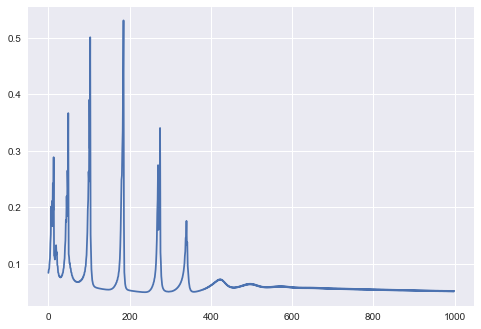

In [147]:
plt.plot(losses)
plt.show()

In [148]:
outputs=model1.predict(X)

np.sum(outputs==Y)/Y.shape[0]

0.958

In [149]:
def plot_decision_boundary(model, X, y,cmap=plt.cm.jet):
    """
    Given a model(a function) and a set of points(X), corresponding labels(y), scatter the points in X with color coding
    according to y. Also use the model to predict the label at grid points to get the region for each label, and thus the 
    descion boundary.
    Example usage:
    say we have a function predict(x,other params) which makes 0/1 prediction for point x and we want to plot
    train set then call as:
    plot_decision_boundary(lambda x:predict(x,other params),X_train,Y_train)
    params(3): 
        model : a function which expectes the point to make 0/1 label prediction
        X : a (mx2) numpy array with the points
        y : a (mx1) numpy array with labels
    outputs(None)
    """
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.style.use("seaborn")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.jet)
    plt.show()
    
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

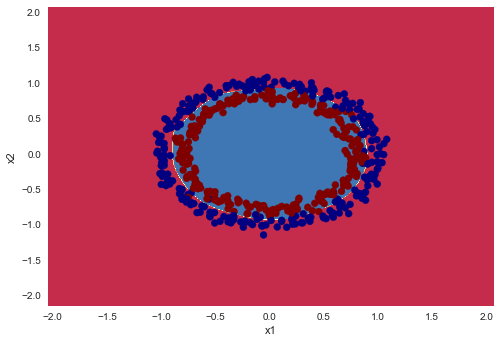

In [150]:
plot_decision_boundary(lambda x:model1.predict(x),X,Y)
